This notebook resamples the public dataset, followed by reindexing with more recent timestamps. 

Note that there are many ways of going about doing this, and there is no perfect way to do it. This is just an example. Chances are high the patterns embedded in the data can be lost as a result.  Also the data set will shrink in size making it harder to fit a ML model

In [1]:
import pandas as pd
import numpy as np
import matplotlib 
from matplotlib import pyplot as pyplt

In [2]:
import logging
logging.getLogger('pyspark').setLevel(logging.ERROR)
logging.getLogger('py4j').setLevel(logging.ERROR)
logging.getLogger('py4j.java_gateway').setLevel(logging.ERROR)
logging.getLogger(' __PROJECT_LIB__').setLevel(logging.ERROR)
logging.getLogger(' __PROJECT_LIB__._get').setLevel(logging.ERROR)

In [3]:
import json
from project_lib import Project
project = Project.access()
current_working_ws_project = Project.access()

Load the kaggle data from the internet, and import the dataset into Watson Studio. Reflect the right name in the following cell to load the data as a data frame.

In [4]:
kaggle_pump_data_df = pd.read_csv('/project_data/data_asset/kaggle-pump-sensor.csv')

if 'Unnamed: 0' in kaggle_pump_data_df.columns.tolist():
    kaggle_pump_data_df.drop('Unnamed: 0', axis = 1, inplace = True)
kaggle_pump_data_df['timestamp'] = pd.to_datetime(kaggle_pump_data_df['timestamp'])
print('Machine Status values = ', kaggle_pump_data_df['machine_status'].value_counts())
print(kaggle_pump_data_df.shape)
print(kaggle_pump_data_df.isna().sum())
display(kaggle_pump_data_df.head())
kaggle_pump_data_df.tail()

Machine Status values =  NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64
(220320, 54)
timestamp              0
sensor_00          10208
sensor_01            369
sensor_02             19
sensor_03             19
sensor_04             19
sensor_05             19
sensor_06           4798
sensor_07           5451
sensor_08           5107
sensor_09           4595
sensor_10             19
sensor_11             19
sensor_12             19
sensor_13             19
sensor_14             21
sensor_15         220320
sensor_16             31
sensor_17             46
sensor_18             46
sensor_19             16
sensor_20             16
sensor_21             16
sensor_22             41
sensor_23             16
sensor_24             16
sensor_25             36
sensor_26             20
sensor_27             16
sensor_28             16
sensor_29             72
sensor_30            261
sensor_31             16
sensor_32             68
sensor_33     

timestamp  sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
0 2018-04-01 00:00:00   2.465394   47.09201    53.2118  46.310760   634.3750   
1 2018-04-01 00:01:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2 2018-04-01 00:02:00   2.444734   47.35243    53.2118  46.397570   638.8889   
3 2018-04-01 00:03:00   2.460474   47.09201    53.1684  46.397568   628.1250   
4 2018-04-01 00:04:00   2.445718   47.13541    53.2118  46.397568   636.4583   

   sensor_05  sensor_06  sensor_07  sensor_08  ...  sensor_43  sensor_44  \
0   76.45975   13.41146   16.13136   15.56713  ...   41.92708  39.641200   
1   76.45975   13.41146   16.13136   15.56713  ...   41.92708  39.641200   
2   73.54598   13.32465   16.03733   15.61777  ...   41.66666  39.351852   
3   76.98898   13.31742   16.24711   15.69734  ...   40.88541  39.062500   
4   76.58897   13.35359   16.21094   15.69734  ...   41.40625  38.773150   

   sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  sensor_50  \
0   65.68287   50.92593  38.194440   157.9861   67.70834   243.0556   
1   65.68287   50.92593  38.194440   157.9861   67.70834   243.0556   
2   65.39352   51.21528  38.194443   155.9606   67.12963   241.3194   
3   64.81481   51.21528  38.194440   155.9606   66.84028   240.4514   
4   65.10416   51.79398  38.773150   158.2755   66.55093   242.1875   

   sensor_51  machine_status  
0   201.3889          NORMAL  
1   201.3889          NORMAL  
2   203.7037          NORMAL  
3   203.1250          NORMAL  
4   201.3889          NORMAL  

[5 rows x 54 columns]

timestamp  sensor_00  sensor_01  sensor_02  sensor_03  \
220315 2018-08-31 23:55:00   2.407350   47.69965  50.520830  43.142361   
220316 2018-08-31 23:56:00   2.400463   47.69965  50.564240  43.142361   
220317 2018-08-31 23:57:00   2.396528   47.69965  50.520830  43.142361   
220318 2018-08-31 23:58:00   2.406366   47.69965  50.520832  43.142361   
220319 2018-08-31 23:59:00   2.396528   47.69965  50.520832  43.142361   

         sensor_04  sensor_05  sensor_06  sensor_07  sensor_08  ...  \
220315  634.722229   64.59095   15.11863   16.65220   15.65393  ...   
220316  630.902771   65.83363   15.15480   16.70284   15.65393  ...   
220317  625.925903   67.29445   15.08970   16.70284   15.69734  ...   
220318  635.648100   65.09175   15.11863   16.56539   15.74074  ...   
220319  639.814800   65.45634   15.11863   16.65220   15.65393  ...   

        sensor_43  sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  \
220315   38.28125   68.28703   52.37268   48.32176  41.087960   212.3843   
220316   38.28125   66.84028   50.63657   48.03241  40.798610   213.8310   
220317   39.06250   65.39352   48.90046   48.03241  40.798610   217.3032   
220318   40.62500   64.23611   47.74306   48.32176  40.509258   222.5116   
220319   41.40625   62.78935   46.29630   48.90046  40.219910   227.4306   

        sensor_49  sensor_50  sensor_51  machine_status  
220315   153.6458        NaN   231.1921          NORMAL  
220316   156.2500        NaN   231.1921          NORMAL  
220317   155.3819        NaN   232.0602          NORMAL  
220318   153.9352        NaN   234.0856          NORMAL  
220319   150.4630        NaN   234.0856          NORMAL  

[5 rows x 54 columns]

Take note of the failure records. The intent is to preserve these at the end after resampling and reindexing.

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64


<AxesSubplot:>

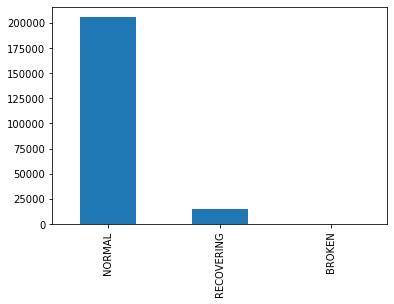

In [5]:
machine_status_value_counts = kaggle_pump_data_df['machine_status'].value_counts()
print(machine_status_value_counts)
machine_status_value_counts.plot(kind = 'bar')

In [6]:
sensor_measurements = sorted(set(kaggle_pump_data_df.columns.tolist()) - set(['asset_id','timestamp','machine_status']))
print(sensor_measurements)

['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_50', 'sensor_51']


Resample at some frequency and reindex using some timeline

In [7]:
kaggle_pump_data_df['timestamp'] = pd.date_range('2019-11-25', periods = kaggle_pump_data_df.shape[0], freq = '8min')
display(kaggle_pump_data_df.head())
kaggle_pump_data_df.tail()

timestamp  sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
0 2019-11-25 00:00:00   2.465394   47.09201    53.2118  46.310760   634.3750   
1 2019-11-25 00:08:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2 2019-11-25 00:16:00   2.444734   47.35243    53.2118  46.397570   638.8889   
3 2019-11-25 00:24:00   2.460474   47.09201    53.1684  46.397568   628.1250   
4 2019-11-25 00:32:00   2.445718   47.13541    53.2118  46.397568   636.4583   

   sensor_05  sensor_06  sensor_07  sensor_08  ...  sensor_43  sensor_44  \
0   76.45975   13.41146   16.13136   15.56713  ...   41.92708  39.641200   
1   76.45975   13.41146   16.13136   15.56713  ...   41.92708  39.641200   
2   73.54598   13.32465   16.03733   15.61777  ...   41.66666  39.351852   
3   76.98898   13.31742   16.24711   15.69734  ...   40.88541  39.062500   
4   76.58897   13.35359   16.21094   15.69734  ...   41.40625  38.773150   

   sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  sensor_50  \
0   65.68287   50.92593  38.194440   157.9861   67.70834   243.0556   
1   65.68287   50.92593  38.194440   157.9861   67.70834   243.0556   
2   65.39352   51.21528  38.194443   155.9606   67.12963   241.3194   
3   64.81481   51.21528  38.194440   155.9606   66.84028   240.4514   
4   65.10416   51.79398  38.773150   158.2755   66.55093   242.1875   

   sensor_51  machine_status  
0   201.3889          NORMAL  
1   201.3889          NORMAL  
2   203.7037          NORMAL  
3   203.1250          NORMAL  
4   201.3889          NORMAL  

[5 rows x 54 columns]

timestamp  sensor_00  sensor_01  sensor_02  sensor_03  \
220315 2023-04-01 23:20:00   2.407350   47.69965  50.520830  43.142361   
220316 2023-04-01 23:28:00   2.400463   47.69965  50.564240  43.142361   
220317 2023-04-01 23:36:00   2.396528   47.69965  50.520830  43.142361   
220318 2023-04-01 23:44:00   2.406366   47.69965  50.520832  43.142361   
220319 2023-04-01 23:52:00   2.396528   47.69965  50.520832  43.142361   

         sensor_04  sensor_05  sensor_06  sensor_07  sensor_08  ...  \
220315  634.722229   64.59095   15.11863   16.65220   15.65393  ...   
220316  630.902771   65.83363   15.15480   16.70284   15.65393  ...   
220317  625.925903   67.29445   15.08970   16.70284   15.69734  ...   
220318  635.648100   65.09175   15.11863   16.56539   15.74074  ...   
220319  639.814800   65.45634   15.11863   16.65220   15.65393  ...   

        sensor_43  sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  \
220315   38.28125   68.28703   52.37268   48.32176  41.087960   212.3843   
220316   38.28125   66.84028   50.63657   48.03241  40.798610   213.8310   
220317   39.06250   65.39352   48.90046   48.03241  40.798610   217.3032   
220318   40.62500   64.23611   47.74306   48.32176  40.509258   222.5116   
220319   41.40625   62.78935   46.29630   48.90046  40.219910   227.4306   

        sensor_49  sensor_50  sensor_51  machine_status  
220315   153.6458        NaN   231.1921          NORMAL  
220316   156.2500        NaN   231.1921          NORMAL  
220317   155.3819        NaN   232.0602          NORMAL  
220318   153.9352        NaN   234.0856          NORMAL  
220319   150.4630        NaN   234.0856          NORMAL  

[5 rows x 54 columns]

In the following scenario we treat both BROKEN and RECOVERING as `abnormal` conditions that can't support production. So we treat both as indicative of the pump being in failure mode. There are alternatives to this that can potentially result in more data loss.

In [8]:
failure_records_df = kaggle_pump_data_df[(kaggle_pump_data_df['machine_status'] == 'BROKEN') | (kaggle_pump_data_df['machine_status'] == 'RECOVERING')]
print(failure_records_df.shape)
display(failure_records_df.head())
failure_records_df.tail()

(14484, 54)


timestamp  sensor_00  sensor_01  sensor_02  sensor_03  \
17155 2020-02-28 07:20:00        0.0   53.34201   52.82118  43.402775   
17156 2020-02-28 07:28:00        0.0   53.55902   52.77777  43.402775   
17157 2020-02-28 07:36:00        0.0   53.55902   52.77777  43.402775   
17158 2020-02-28 07:44:00        0.0   52.77777   52.69097  43.402770   
17159 2020-02-28 07:52:00        0.0   52.60416   52.73437  43.446180   

        sensor_04  sensor_05  sensor_06  sensor_07  sensor_08  ...  sensor_43  \
17155  202.526031   49.79289   3.219039   16.89091  16.869210  ...   50.78125   
17156  204.725098   53.74214   3.045428   17.42621  15.740740  ...   49.47916   
17157  201.137131   52.49996   7.537616   13.53443   9.324364  ...   48.17708   
17158  204.030655   57.19875   7.609953   16.60880  16.203700  ...   46.87500   
17159  203.567688   50.96181   7.573785   16.70284  16.160300  ...   45.83333   

       sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  \
17155   50.92593   51.21528   50.63657   46.00694   409.1435   121.5278   
17156   50.34722   51.21528   49.18982   49.47917   431.7130   133.1019   
17157   49.76852   50.92593   48.03241   53.81944   451.3889   140.0463   
17158   48.03241   50.34722   47.45370   58.15972   466.4352   144.9653   
17159   47.45370   49.76852   46.58565   63.65741   474.8264   149.0162   

       sensor_50  sensor_51  machine_status  
17155   401.9097   324.6528          BROKEN  
17156   419.2708   341.7245      RECOVERING  
17157   433.1597   466.1458      RECOVERING  
17158   442.7083   366.0301      RECOVERING  
17159   449.6528   374.4213      RECOVERING  

[5 rows x 54 columns]

timestamp  sensor_00  sensor_01  sensor_02  sensor_03  \
166511 2022-06-07 01:28:00   0.310880   46.48438  51.171870  46.527775   
166512 2022-06-07 01:36:00   0.304977   46.39757  51.085070  46.527770   
166513 2022-06-07 01:44:00   0.303993   46.31076  51.085070  46.484380   
166514 2022-06-07 01:52:00   0.301042   46.18055  51.041664  46.484380   
166515 2022-06-07 02:00:00   0.301042   46.09375  50.998260  46.440970   

         sensor_04  sensor_05  sensor_06  sensor_07  sensor_08  ...  \
166511  152.526031   60.77931   15.08970   17.62876   18.20023  ...   
166512  152.178802   61.24545   15.08970   17.62153   18.24363  ...   
166513  151.021393   52.94817   15.12587   17.62153   18.23640  ...   
166514  152.988983   53.20142   15.08970   17.66493   18.30150  ...   
166515  151.252900   56.64543   15.11863   17.67940   18.12789  ...   

        sensor_43  sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  \
166511  59.895830   77.83565   73.78472   58.44907   58.15972   295.4283   
166512  58.854160   75.81019   69.44444   56.71296   58.15972   278.9352   
166513  57.552080   81.30787   65.10416   53.81944   60.47454   267.9398   
166514  57.552082   96.64352   62.21065   52.37268   63.94676   262.4421   
166515  57.552080  111.40050   59.31713   51.21528   65.68287   258.6805   

        sensor_49  sensor_50  sensor_51  machine_status  
166511   260.4167        NaN   211.2269      RECOVERING  
166512   244.2130        NaN   195.0231      RECOVERING  
166513   229.1667        NaN   180.5556      RECOVERING  
166514   216.7245        NaN   168.1134      RECOVERING  
166515   211.2269        NaN   157.4074      RECOVERING  

[5 rows x 54 columns]

First take the normal records, recovery records, and broken records in indiviual data frames.

Then start putting them together by preserving the reindexed / resampled failure records.

1. Take only those normal records that don't overlap (timestamp wise) with recovery records
2. Add the recovery records to it
3. Remove the records in the above combination with timestamp that overlap with failures
4. Add the failure records

In [9]:
normal_records_df = kaggle_pump_data_df[(kaggle_pump_data_df['machine_status'] == 'NORMAL')]
print(normal_records_df.shape)
display(normal_records_df.head())
normal_records_df.tail()

(205836, 54)


timestamp  sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
0 2019-11-25 00:00:00   2.465394   47.09201    53.2118  46.310760   634.3750   
1 2019-11-25 00:08:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2 2019-11-25 00:16:00   2.444734   47.35243    53.2118  46.397570   638.8889   
3 2019-11-25 00:24:00   2.460474   47.09201    53.1684  46.397568   628.1250   
4 2019-11-25 00:32:00   2.445718   47.13541    53.2118  46.397568   636.4583   

   sensor_05  sensor_06  sensor_07  sensor_08  ...  sensor_43  sensor_44  \
0   76.45975   13.41146   16.13136   15.56713  ...   41.92708  39.641200   
1   76.45975   13.41146   16.13136   15.56713  ...   41.92708  39.641200   
2   73.54598   13.32465   16.03733   15.61777  ...   41.66666  39.351852   
3   76.98898   13.31742   16.24711   15.69734  ...   40.88541  39.062500   
4   76.58897   13.35359   16.21094   15.69734  ...   41.40625  38.773150   

   sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  sensor_50  \
0   65.68287   50.92593  38.194440   157.9861   67.70834   243.0556   
1   65.68287   50.92593  38.194440   157.9861   67.70834   243.0556   
2   65.39352   51.21528  38.194443   155.9606   67.12963   241.3194   
3   64.81481   51.21528  38.194440   155.9606   66.84028   240.4514   
4   65.10416   51.79398  38.773150   158.2755   66.55093   242.1875   

   sensor_51  machine_status  
0   201.3889          NORMAL  
1   201.3889          NORMAL  
2   203.7037          NORMAL  
3   203.1250          NORMAL  
4   201.3889          NORMAL  

[5 rows x 54 columns]

timestamp  sensor_00  sensor_01  sensor_02  sensor_03  \
220315 2023-04-01 23:20:00   2.407350   47.69965  50.520830  43.142361   
220316 2023-04-01 23:28:00   2.400463   47.69965  50.564240  43.142361   
220317 2023-04-01 23:36:00   2.396528   47.69965  50.520830  43.142361   
220318 2023-04-01 23:44:00   2.406366   47.69965  50.520832  43.142361   
220319 2023-04-01 23:52:00   2.396528   47.69965  50.520832  43.142361   

         sensor_04  sensor_05  sensor_06  sensor_07  sensor_08  ...  \
220315  634.722229   64.59095   15.11863   16.65220   15.65393  ...   
220316  630.902771   65.83363   15.15480   16.70284   15.65393  ...   
220317  625.925903   67.29445   15.08970   16.70284   15.69734  ...   
220318  635.648100   65.09175   15.11863   16.56539   15.74074  ...   
220319  639.814800   65.45634   15.11863   16.65220   15.65393  ...   

        sensor_43  sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  \
220315   38.28125   68.28703   52.37268   48.32176  41.087960   212.3843   
220316   38.28125   66.84028   50.63657   48.03241  40.798610   213.8310   
220317   39.06250   65.39352   48.90046   48.03241  40.798610   217.3032   
220318   40.62500   64.23611   47.74306   48.32176  40.509258   222.5116   
220319   41.40625   62.78935   46.29630   48.90046  40.219910   227.4306   

        sensor_49  sensor_50  sensor_51  machine_status  
220315   153.6458        NaN   231.1921          NORMAL  
220316   156.2500        NaN   231.1921          NORMAL  
220317   155.3819        NaN   232.0602          NORMAL  
220318   153.9352        NaN   234.0856          NORMAL  
220319   150.4630        NaN   234.0856          NORMAL  

[5 rows x 54 columns]

###### Resample at the rate of 24 hours using mean as the aggregation function

In [10]:
normal_records_df.set_index('timestamp', inplace = True)
agg_fns = {var:'mean' for var in sensor_measurements}
normal_records_df = normal_records_df.resample('24H').agg(agg_fns)
normal_records_df['asset_id'] = 'PUMP-3876'
normal_records_df['machine_status'] = 'NORMAL'
print(normal_records_df.shape)
display(normal_records_df.head())
normal_records_df.tail()

(1224, 54)


sensor_00  sensor_01  sensor_02  sensor_03   sensor_04  sensor_05  \
timestamp                                                                       
2019-11-25   2.454124  48.521651  53.086659  45.917967  634.261195  75.106401   
2019-11-26   2.454091  48.067611  52.885319  45.239437  634.028005  72.457242   
2019-11-27   2.454162  46.882473  52.547741  44.823735  633.935177  74.061776   
2019-11-28   2.454222  46.601319  52.434171  45.273677  634.954348  73.439419   
2019-11-29   2.453987  47.860242  52.780427  46.145350  634.696986  75.166017   

            sensor_06  sensor_07  sensor_08  sensor_09  ...  sensor_44  \
timestamp                                               ...              
2019-11-25  13.517834  16.159856  15.694364  15.090383  ...  41.407857   
2019-11-26  13.597486  16.157967  15.696575  15.092674  ...  53.991448   
2019-11-27  13.513292  16.160580  15.666554  15.087249  ...  55.351402   
2019-11-28  13.344946  16.167010  15.678169  15.086284  ...  54.710005   
2019-11-29  13.351055  16.161303  15.673628  15.091749  ...  59.770448   

            sensor_45  sensor_46  sensor_47   sensor_48   sensor_49  \
timestamp                                                             
2019-11-25  49.429334  46.482768  39.031957  183.920076   75.800541   
2019-11-26  61.837706  51.240998  38.736175  200.657471  103.338798   
2019-11-27  55.592528  42.742091  39.072144  214.248972  108.018260   
2019-11-28  50.724987  44.700038  42.306456  200.869662   96.164481   
2019-11-29  52.858153  48.866705  42.751736  202.019033  101.538388   

             sensor_50   sensor_51   asset_id  machine_status  
timestamp                                                      
2019-11-25  231.928371  207.921807  PUMP-3876          NORMAL  
2019-11-26  245.225696  216.391781  PUMP-3876          NORMAL  
2019-11-27  241.538062  210.863552  PUMP-3876          NORMAL  
2019-11-28  242.978392  212.594844  PUMP-3876          NORMAL  
2019-11-29  231.573112  220.992476  PUMP-3876          NORMAL  

[5 rows x 54 columns]

sensor_00  sensor_01  sensor_02  sensor_03   sensor_04  sensor_05  \
timestamp                                                                       
2023-03-28   2.402791  51.593362  51.257954  44.655670  627.556543  77.754073   
2023-03-29   2.420822  50.335646  52.329763  45.108264  630.655406  73.575111   
2023-03-30   2.402808  50.565199  52.166761  44.605274  632.023558  75.681375   
2023-03-31   2.402592  49.398244  51.008070  43.506011  631.933956  72.777791   
2023-04-01   2.402649  47.933544  50.588349  43.128857  631.943893  70.282040   

            sensor_06  sensor_07  sensor_08  sensor_09  ...  sensor_44  \
timestamp                                               ...              
2023-03-28  14.987380  16.526290  15.708309  15.121769  ...  76.284401   
2023-03-29  15.106818  16.932628  15.960086  15.354696  ...  88.118893   
2023-03-30  15.112043  17.167246  16.185417  15.360604  ...  71.024626   
2023-03-31  15.116304  16.803865  15.803025  15.164816  ...  67.585726   
2023-04-01  15.110556  16.658832  15.674793  15.093879  ...  62.618955   

            sensor_45  sensor_46  sensor_47   sensor_48   sensor_49  \
timestamp                                                             
2023-03-28  65.266525  59.722222  44.047389  279.935054  131.312694   
2023-03-29  71.498842  65.043081  50.483861  315.470678  168.688913   
2023-03-30  66.642554  57.101980  45.534336  241.833846   99.614199   
2023-03-31  55.720666  54.664613  41.153353  260.241748  115.474271   
2023-04-01  56.540959  55.135995  44.523211  287.753986  115.928823   

            sensor_50   sensor_51   asset_id  machine_status  
timestamp                                                     
2023-03-28        NaN  234.799381  PUMP-3876          NORMAL  
2023-03-29        NaN  245.492544  PUMP-3876          NORMAL  
2023-03-30        NaN  192.677789  PUMP-3876          NORMAL  
2023-03-31        NaN  220.535154  PUMP-3876          NORMAL  
2023-04-01        NaN  219.936341  PUMP-3876          NORMAL  

[5 rows x 54 columns]

###### Resample recovery records

In [11]:
recovery_records_df = kaggle_pump_data_df[(kaggle_pump_data_df['machine_status'] == 'RECOVERING')]
print(recovery_records_df.shape)
recovery_records_df.head()

(14477, 54)


timestamp  sensor_00  sensor_01  sensor_02  sensor_03  \
17156 2020-02-28 07:28:00        0.0   53.55902   52.77777  43.402775   
17157 2020-02-28 07:36:00        0.0   53.55902   52.77777  43.402775   
17158 2020-02-28 07:44:00        0.0   52.77777   52.69097  43.402770   
17159 2020-02-28 07:52:00        0.0   52.60416   52.73437  43.446180   
17160 2020-02-28 08:00:00        NaN   52.51736   52.69097  43.446180   

        sensor_04  sensor_05  sensor_06  sensor_07  sensor_08  ...  sensor_43  \
17156  204.725098   53.74214   3.045428   17.42621  15.740740  ...   49.47916   
17157  201.137131   52.49996   7.537616   13.53443   9.324364  ...   48.17708   
17158  204.030655   57.19875   7.609953   16.60880  16.203700  ...   46.87500   
17159  203.567688   50.96181   7.573785   16.70284  16.160300  ...   45.83333   
17160  203.567688   49.78948   7.559317   16.56539  16.239870  ...   44.27083   

       sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  \
17156   50.34722   51.21528   49.18982   49.47917   431.7130   133.1019   
17157   49.76852   50.92593   48.03241   53.81944   451.3889   140.0463   
17158   48.03241   50.34722   47.45370   58.15972   466.4352   144.9653   
17159   47.45370   49.76852   46.58565   63.65741   474.8264   149.0162   
17160   46.29630   48.03241   45.13889   75.23148   477.7199   162.6157   

       sensor_50  sensor_51  machine_status  
17156   419.2708   341.7245      RECOVERING  
17157   433.1597   466.1458      RECOVERING  
17158   442.7083   366.0301      RECOVERING  
17159   449.6528   374.4213      RECOVERING  
17160   448.7847   356.1921      RECOVERING  

[5 rows x 54 columns]

In [12]:
recovery_records_df.set_index('timestamp', inplace = True)
recovery_records_df = recovery_records_df.resample('1d').agg(agg_fns)
recovery_records_df.dropna(subset = sensor_measurements, how = 'all',  inplace = True)
recovery_records_df['asset_id'] = 'PUMP-3876'
recovery_records_df['machine_status'] = 'RECOVERING'
print(recovery_records_df.shape)
display(recovery_records_df.head())
recovery_records_df.tail()

(86, 54)


sensor_00  sensor_01  sensor_02  sensor_03   sensor_04  sensor_05  \
timestamp                                                                       
2020-02-28        0.0  47.132615  51.498527  43.859556   20.780408   3.215114   
2020-02-29        NaN  45.562064  49.468797  44.552950    3.089313  61.439108   
2020-03-01        NaN  45.232927  48.042293  42.042340    3.132394   0.000000   
2020-03-02        NaN  45.563753  48.720099  42.232830    3.169046   0.000000   
2020-03-03        NaN  46.222751  49.901377  43.956403  154.694624   0.000000   

            sensor_06  sensor_07  sensor_08  sensor_09  ...  sensor_44  \
timestamp                                               ...              
2020-02-28   3.094140   2.228826   1.422783  13.638507  ...  44.193828   
2020-02-29   3.013959   0.036169   0.030864  15.057912  ...  32.716050   
2020-03-01   5.729287  12.823622  13.633335  16.235612  ...  32.592271   
2020-03-02   6.638214  16.527095  16.571060  16.483008  ...  33.286716   
2020-03-03   5.285896  11.330817  12.376543  11.080487  ...  35.762281   

            sensor_45   sensor_46  sensor_47   sensor_48   sensor_49  \
timestamp                                                              
2020-02-28  46.391968   36.967032  44.723529  187.768349  111.965165   
2020-02-29  33.939364   33.246529  33.272249   57.142167   58.947506   
2020-03-01  83.045590  105.068481  36.517811   53.830697   46.990740   
2020-03-02  33.246528   36.545139  33.416924   34.256044   32.973251   
2020-03-03  35.448817   36.617477  35.431134   34.010095   34.039030   

             sensor_50   sensor_51   asset_id  machine_status  
timestamp                                                      
2020-02-28  232.608549  160.622946  PUMP-3876      RECOVERING  
2020-02-29   68.862525   53.483475  PUMP-3876      RECOVERING  
2020-03-01   59.876543   47.805748  PUMP-3876      RECOVERING  
2020-03-02   34.963731   33.678948  PUMP-3876      RECOVERING  
2020-03-03   36.082175   36.273469  PUMP-3876      RECOVERING  

[5 rows x 54 columns]

sensor_00  sensor_01  sensor_02  sensor_03   sensor_04  sensor_05  \
timestamp                                                                       
2021-12-20   0.017719  39.079471  36.176093  41.368907   57.660013   0.000000   
2021-12-21   0.109780  40.193524  37.350897  41.088131  194.073826   0.064744   
2022-01-17   0.678747  44.742970  52.636982  44.959983  202.093062  66.959745   
2022-06-06   0.441541  46.502764  52.474692  45.060174   29.446846  20.235032   
2022-06-07   0.172472  46.828883  51.291231  46.587456   72.795133  32.429265   

            sensor_06  sensor_07  sensor_08  sensor_09  ...   sensor_44  \
timestamp                                               ...               
2021-12-20   2.142860  20.622623  21.210016  21.576555  ...   32.229594   
2021-12-21  10.987115  13.500816  12.608166  12.099162  ...   32.378472   
2022-01-17  12.249462  13.416749  13.030362  12.512527  ...   35.230351   
2022-06-06   8.894382  16.673654  16.629395  15.605016  ...  123.318151   
2022-06-07  15.117729  17.664026  18.217409  16.351997  ...  102.105036   

             sensor_45   sensor_46   sensor_47   sensor_48   sensor_49  \
timestamp                                                                
2021-12-20   32.965097   37.614124   36.102705   34.487831   32.463985   
2021-12-21   33.055895   36.043028   35.588576   34.240537   33.011642   
2022-01-17   34.256437   36.352473   37.869805   66.748533   40.720980   
2022-06-06  109.992939  135.882571  131.086197  212.467636  119.526837   
2022-06-07  103.461379   68.992332   67.961516  371.509694  340.567137   

             sensor_50   sensor_51   asset_id  machine_status  
timestamp                                                      
2021-12-20   33.936608   34.238892  PUMP-3876      RECOVERING  
2021-12-21   35.866013   35.801334  PUMP-3876      RECOVERING  
2022-01-17  151.994412  157.379176  PUMP-3876      RECOVERING  
2022-06-06         NaN  157.333844  PUMP-3876      RECOVERING  
2022-06-07         NaN  277.361831  PUMP-3876      RECOVERING  

[5 rows x 54 columns]

###### Resample records with broken status

In [13]:
broken_records_df = kaggle_pump_data_df[(kaggle_pump_data_df['machine_status'] == 'BROKEN')]
print(broken_records_df.shape)
broken_records_df.head(10)

(7, 54)


timestamp  sensor_00  sensor_01  sensor_02  sensor_03  \
17155  2020-02-28 07:20:00   0.000000  53.342010  52.821180  43.402775   
24510  2020-04-09 04:00:00   1.093982  42.534720  47.699650  41.449650   
69318  2020-12-14 02:24:00   2.258796  47.265630  52.734370  43.446178   
77790  2021-01-30 04:00:00   2.321759  47.482640  51.475693  42.795135   
128040 2021-11-05 08:00:00   0.364005  40.190970  45.225690  40.190971   
141131 2022-01-17 01:28:00   0.001968  45.138890  52.907990  45.355900   
166440 2022-06-06 16:00:00   2.318808  45.833332  52.994790  43.880210   

         sensor_04  sensor_05  sensor_06  sensor_07  sensor_08  ...  \
17155   202.526031   49.79289   3.219039  16.890910  16.869210  ...   
24510   206.038757   60.30106  12.304690  15.154800  14.185470  ...   
69318   200.115738   66.14643  13.592300  15.914350  15.147570  ...   
77790   612.152800   67.30158  14.062500  16.608800  15.943290  ...   
128040  201.368622    0.00000  11.335360  15.270540  15.183740  ...   
141131  500.000000    1.40131   0.028935   0.036169   0.036169  ...   
166440  420.503448   72.52040  14.185470  16.247110  15.697340  ...   

        sensor_43  sensor_44  sensor_45   sensor_46   sensor_47   sensor_48  \
17155    50.78125   50.92593  51.215280   50.636570   46.006940  409.143500   
24510    42.70833   34.72222  31.539350   34.432870   33.275460   59.895830   
69318    39.06250   35.01157  37.905090   39.062500   45.428240  144.675900   
77790   202.34370   65.68287  57.870370  127.893500  153.935200  155.381900   
128040   32.29166   28.06713  28.067129   29.513889   29.224537   29.224537   
141131   36.19791   37.32639  35.300930   38.194440   43.402780   99.537030   
166440   51.30208   52.10200  52.662040   67.129630   43.981480  230.324100   

         sensor_49   sensor_50  sensor_51  machine_status  
17155   121.527800  401.909700   324.6528          BROKEN  
24510    44.560180  177.662000   183.7384          BROKEN  
69318    49.768520  246.238400   257.5231          BROKEN  
77790    65.682870  220.196800   267.3611          BROKEN  
128040   29.513889   32.407406        NaN          BROKEN  
141131   44.849540  192.129600   174.7685          BROKEN  
166440   69.733800         NaN   205.7292          BROKEN  

[7 rows x 54 columns]

In [14]:
broken_records_df.set_index('timestamp', inplace = True)
broken_records_df = broken_records_df.resample('1d').agg(agg_fns)
broken_records_df.dropna(inplace = True, subset = sensor_measurements, how = 'all')
broken_records_df['asset_id'] = 'PUMP-3876'
broken_records_df['machine_status'] = 'BROKEN'
print(broken_records_df.shape)
display(broken_records_df.head(10))
broken_records_df.tail(10)

(7, 54)


sensor_00  sensor_01  sensor_02  sensor_03   sensor_04  sensor_05  \
timestamp                                                                       
2020-02-28   0.000000  53.342010  52.821180  43.402775  202.526031   49.79289   
2020-04-09   1.093982  42.534720  47.699650  41.449650  206.038757   60.30106   
2020-12-14   2.258796  47.265630  52.734370  43.446178  200.115738   66.14643   
2021-01-30   2.321759  47.482640  51.475693  42.795135  612.152800   67.30158   
2021-11-05   0.364005  40.190970  45.225690  40.190971  201.368622    0.00000   
2022-01-17   0.001968  45.138890  52.907990  45.355900  500.000000    1.40131   
2022-06-06   2.318808  45.833332  52.994790  43.880210  420.503448   72.52040   

            sensor_06  sensor_07  sensor_08  sensor_09  ...  sensor_44  \
timestamp                                               ...              
2020-02-28   3.219039  16.890910  16.869210  15.082470  ...   50.92593   
2020-04-09  12.304690  15.154800  14.185470  13.867190  ...   34.72222   
2020-12-14  13.592300  15.914350  15.147570  14.793110  ...   35.01157   
2021-01-30  14.062500  16.608800  15.943290  15.596060  ...   65.68287   
2021-11-05  11.335360  15.270540  15.183740  15.118630  ...   28.06713   
2022-01-17   0.028935   0.036169   0.036169   0.007234  ...   37.32639   
2022-06-06  14.185470  16.247110  15.697340  15.053530  ...   52.10200   

            sensor_45   sensor_46   sensor_47   sensor_48   sensor_49  \
timestamp                                                               
2020-02-28  51.215280   50.636570   46.006940  409.143500  121.527800   
2020-04-09  31.539350   34.432870   33.275460   59.895830   44.560180   
2020-12-14  37.905090   39.062500   45.428240  144.675900   49.768520   
2021-01-30  57.870370  127.893500  153.935200  155.381900   65.682870   
2021-11-05  28.067129   29.513889   29.224537   29.224537   29.513889   
2022-01-17  35.300930   38.194440   43.402780   99.537030   44.849540   
2022-06-06  52.662040   67.129630   43.981480  230.324100   69.733800   

             sensor_50  sensor_51   asset_id  machine_status  
timestamp                                                     
2020-02-28  401.909700   324.6528  PUMP-3876          BROKEN  
2020-04-09  177.662000   183.7384  PUMP-3876          BROKEN  
2020-12-14  246.238400   257.5231  PUMP-3876          BROKEN  
2021-01-30  220.196800   267.3611  PUMP-3876          BROKEN  
2021-11-05   32.407406        NaN  PUMP-3876          BROKEN  
2022-01-17  192.129600   174.7685  PUMP-3876          BROKEN  
2022-06-06         NaN   205.7292  PUMP-3876          BROKEN  

[7 rows x 54 columns]

sensor_00  sensor_01  sensor_02  sensor_03   sensor_04  sensor_05  \
timestamp                                                                       
2020-02-28   0.000000  53.342010  52.821180  43.402775  202.526031   49.79289   
2020-04-09   1.093982  42.534720  47.699650  41.449650  206.038757   60.30106   
2020-12-14   2.258796  47.265630  52.734370  43.446178  200.115738   66.14643   
2021-01-30   2.321759  47.482640  51.475693  42.795135  612.152800   67.30158   
2021-11-05   0.364005  40.190970  45.225690  40.190971  201.368622    0.00000   
2022-01-17   0.001968  45.138890  52.907990  45.355900  500.000000    1.40131   
2022-06-06   2.318808  45.833332  52.994790  43.880210  420.503448   72.52040   

            sensor_06  sensor_07  sensor_08  sensor_09  ...  sensor_44  \
timestamp                                               ...              
2020-02-28   3.219039  16.890910  16.869210  15.082470  ...   50.92593   
2020-04-09  12.304690  15.154800  14.185470  13.867190  ...   34.72222   
2020-12-14  13.592300  15.914350  15.147570  14.793110  ...   35.01157   
2021-01-30  14.062500  16.608800  15.943290  15.596060  ...   65.68287   
2021-11-05  11.335360  15.270540  15.183740  15.118630  ...   28.06713   
2022-01-17   0.028935   0.036169   0.036169   0.007234  ...   37.32639   
2022-06-06  14.185470  16.247110  15.697340  15.053530  ...   52.10200   

            sensor_45   sensor_46   sensor_47   sensor_48   sensor_49  \
timestamp                                                               
2020-02-28  51.215280   50.636570   46.006940  409.143500  121.527800   
2020-04-09  31.539350   34.432870   33.275460   59.895830   44.560180   
2020-12-14  37.905090   39.062500   45.428240  144.675900   49.768520   
2021-01-30  57.870370  127.893500  153.935200  155.381900   65.682870   
2021-11-05  28.067129   29.513889   29.224537   29.224537   29.513889   
2022-01-17  35.300930   38.194440   43.402780   99.537030   44.849540   
2022-06-06  52.662040   67.129630   43.981480  230.324100   69.733800   

             sensor_50  sensor_51   asset_id  machine_status  
timestamp                                                     
2020-02-28  401.909700   324.6528  PUMP-3876          BROKEN  
2020-04-09  177.662000   183.7384  PUMP-3876          BROKEN  
2020-12-14  246.238400   257.5231  PUMP-3876          BROKEN  
2021-01-30  220.196800   267.3611  PUMP-3876          BROKEN  
2021-11-05   32.407406        NaN  PUMP-3876          BROKEN  
2022-01-17  192.129600   174.7685  PUMP-3876          BROKEN  
2022-06-06         NaN   205.7292  PUMP-3876          BROKEN  

[7 rows x 54 columns]

In [15]:
print('Normal records shape = ', normal_records_df.shape)
recovery_records_df.reset_index(inplace = True, drop = False)
print('Recovery record shape = ', recovery_records_df.shape)
recovery_records_df.reset_index(inplace = True, drop = False)
normal_records_df.reset_index(inplace = True, drop = False)
recovery_record_timestamps = pd.to_datetime(recovery_records_df['timestamp']).values
#print(recovering_record_timestamps)
pump_normal_data_without_recovery_records_df = normal_records_df[~normal_records_df['timestamp'].isin(recovery_record_timestamps)]
print(pump_normal_data_without_recovery_records_df.shape)

pump_normal_data_with_recovery_records_df = pump_normal_data_without_recovery_records_df.append(recovery_records_df)
pump_normal_data_with_recovery_records_df.sort_values('timestamp', inplace = True)
pump_normal_data_with_recovery_records_df.reset_index(inplace = True, drop = True)
print(pump_normal_data_with_recovery_records_df.shape)
print(pump_normal_data_with_recovery_records_df['machine_status'].value_counts())
display(pump_normal_data_with_recovery_records_df.head())
pump_normal_data_with_recovery_records_df.tail()

Normal records shape =  (1224, 54)
Recovery record shape =  (86, 55)
(1138, 55)
(1224, 56)
NORMAL        1138
RECOVERING      86
Name: machine_status, dtype: int64


timestamp  sensor_00  sensor_01  sensor_02  sensor_03   sensor_04  \
0 2019-11-25   2.454124  48.521651  53.086659  45.917967  634.261195   
1 2019-11-26   2.454091  48.067611  52.885319  45.239437  634.028005   
2 2019-11-27   2.454162  46.882473  52.547741  44.823735  633.935177   
3 2019-11-28   2.454222  46.601319  52.434171  45.273677  634.954348   
4 2019-11-29   2.453987  47.860242  52.780427  46.145350  634.696986   

   sensor_05  sensor_06  sensor_07  sensor_08  ...  sensor_45  sensor_46  \
0  75.106401  13.517834  16.159856  15.694364  ...  49.429334  46.482768   
1  72.457242  13.597486  16.157967  15.696575  ...  61.837706  51.240998   
2  74.061776  13.513292  16.160580  15.666554  ...  55.592528  42.742091   
3  73.439419  13.344946  16.167010  15.678169  ...  50.724987  44.700038   
4  75.166017  13.351055  16.161303  15.673628  ...  52.858153  48.866705   

   sensor_47   sensor_48   sensor_49   sensor_50   sensor_51   asset_id  \
0  39.031957  183.920076   75.800541  231.928371  207.921807  PUMP-3876   
1  38.736175  200.657471  103.338798  245.225696  216.391781  PUMP-3876   
2  39.072144  214.248972  108.018260  241.538062  210.863552  PUMP-3876   
3  42.306456  200.869662   96.164481  242.978392  212.594844  PUMP-3876   
4  42.751736  202.019033  101.538388  231.573112  220.992476  PUMP-3876   

   machine_status  index  
0          NORMAL    NaN  
1          NORMAL    NaN  
2          NORMAL    NaN  
3          NORMAL    NaN  
4          NORMAL    NaN  

[5 rows x 56 columns]

timestamp  sensor_00  sensor_01  sensor_02  sensor_03   sensor_04  \
1219 2023-03-28   2.402791  51.593362  51.257954  44.655670  627.556543   
1220 2023-03-29   2.420822  50.335646  52.329763  45.108264  630.655406   
1221 2023-03-30   2.402808  50.565199  52.166761  44.605274  632.023558   
1222 2023-03-31   2.402592  49.398244  51.008070  43.506011  631.933956   
1223 2023-04-01   2.402649  47.933544  50.588349  43.128857  631.943893   

      sensor_05  sensor_06  sensor_07  sensor_08  ...  sensor_45  sensor_46  \
1219  77.754073  14.987380  16.526290  15.708309  ...  65.266525  59.722222   
1220  73.575111  15.106818  16.932628  15.960086  ...  71.498842  65.043081   
1221  75.681375  15.112043  17.167246  16.185417  ...  66.642554  57.101980   
1222  72.777791  15.116304  16.803865  15.803025  ...  55.720666  54.664613   
1223  70.282040  15.110556  16.658832  15.674793  ...  56.540959  55.135995   

      sensor_47   sensor_48   sensor_49  sensor_50   sensor_51   asset_id  \
1219  44.047389  279.935054  131.312694        NaN  234.799381  PUMP-3876   
1220  50.483861  315.470678  168.688913        NaN  245.492544  PUMP-3876   
1221  45.534336  241.833846   99.614199        NaN  192.677789  PUMP-3876   
1222  41.153353  260.241748  115.474271        NaN  220.535154  PUMP-3876   
1223  44.523211  287.753986  115.928823        NaN  219.936341  PUMP-3876   

      machine_status  index  
1219          NORMAL    NaN  
1220          NORMAL    NaN  
1221          NORMAL    NaN  
1222          NORMAL    NaN  
1223          NORMAL    NaN  

[5 rows x 56 columns]

In [16]:
print('Pump reindexed normal + recovery data frame shape = ', pump_normal_data_with_recovery_records_df.shape)
print('Broken record shape = ', broken_records_df.shape)
broken_records_df.reset_index(inplace = True, drop = False)
broken_record_timestamps = pd.to_datetime(broken_records_df['timestamp']).values
print(broken_record_timestamps)

pump_normal_data_with_recovery_records_df = pump_normal_data_with_recovery_records_df[~pump_normal_data_with_recovery_records_df['timestamp'].isin(broken_record_timestamps)]
print(pump_normal_data_with_recovery_records_df.shape)

pump_data_normal_recovery_broken_records_df = pump_normal_data_with_recovery_records_df.append(broken_records_df)
pump_data_normal_recovery_broken_records_df.sort_values('timestamp', inplace = True)
pump_data_normal_recovery_broken_records_df.reset_index(inplace = True, drop = True)
print(pump_data_normal_recovery_broken_records_df.shape)
print(pump_data_normal_recovery_broken_records_df['machine_status'].value_counts())
display(pump_data_normal_recovery_broken_records_df.head())
pump_data_normal_recovery_broken_records_df.tail(5)

Pump reindexed normal + recovery data frame shape =  (1224, 56)
Broken record shape =  (7, 54)
['2020-02-28T00:00:00.000000000' '2020-04-09T00:00:00.000000000'
 '2020-12-14T00:00:00.000000000' '2021-01-30T00:00:00.000000000'
 '2021-11-05T00:00:00.000000000' '2022-01-17T00:00:00.000000000'
 '2022-06-06T00:00:00.000000000']
(1217, 56)
(1224, 56)
NORMAL        1138
RECOVERING      79
BROKEN           7
Name: machine_status, dtype: int64


timestamp  sensor_00  sensor_01  sensor_02  sensor_03   sensor_04  \
0 2019-11-25   2.454124  48.521651  53.086659  45.917967  634.261195   
1 2019-11-26   2.454091  48.067611  52.885319  45.239437  634.028005   
2 2019-11-27   2.454162  46.882473  52.547741  44.823735  633.935177   
3 2019-11-28   2.454222  46.601319  52.434171  45.273677  634.954348   
4 2019-11-29   2.453987  47.860242  52.780427  46.145350  634.696986   

   sensor_05  sensor_06  sensor_07  sensor_08  ...  sensor_45  sensor_46  \
0  75.106401  13.517834  16.159856  15.694364  ...  49.429334  46.482768   
1  72.457242  13.597486  16.157967  15.696575  ...  61.837706  51.240998   
2  74.061776  13.513292  16.160580  15.666554  ...  55.592528  42.742091   
3  73.439419  13.344946  16.167010  15.678169  ...  50.724987  44.700038   
4  75.166017  13.351055  16.161303  15.673628  ...  52.858153  48.866705   

   sensor_47   sensor_48   sensor_49   sensor_50   sensor_51   asset_id  \
0  39.031957  183.920076   75.800541  231.928371  207.921807  PUMP-3876   
1  38.736175  200.657471  103.338798  245.225696  216.391781  PUMP-3876   
2  39.072144  214.248972  108.018260  241.538062  210.863552  PUMP-3876   
3  42.306456  200.869662   96.164481  242.978392  212.594844  PUMP-3876   
4  42.751736  202.019033  101.538388  231.573112  220.992476  PUMP-3876   

   machine_status  index  
0          NORMAL    NaN  
1          NORMAL    NaN  
2          NORMAL    NaN  
3          NORMAL    NaN  
4          NORMAL    NaN  

[5 rows x 56 columns]

timestamp  sensor_00  sensor_01  sensor_02  sensor_03   sensor_04  \
1219 2023-03-28   2.402791  51.593362  51.257954  44.655670  627.556543   
1220 2023-03-29   2.420822  50.335646  52.329763  45.108264  630.655406   
1221 2023-03-30   2.402808  50.565199  52.166761  44.605274  632.023558   
1222 2023-03-31   2.402592  49.398244  51.008070  43.506011  631.933956   
1223 2023-04-01   2.402649  47.933544  50.588349  43.128857  631.943893   

      sensor_05  sensor_06  sensor_07  sensor_08  ...  sensor_45  sensor_46  \
1219  77.754073  14.987380  16.526290  15.708309  ...  65.266525  59.722222   
1220  73.575111  15.106818  16.932628  15.960086  ...  71.498842  65.043081   
1221  75.681375  15.112043  17.167246  16.185417  ...  66.642554  57.101980   
1222  72.777791  15.116304  16.803865  15.803025  ...  55.720666  54.664613   
1223  70.282040  15.110556  16.658832  15.674793  ...  56.540959  55.135995   

      sensor_47   sensor_48   sensor_49  sensor_50   sensor_51   asset_id  \
1219  44.047389  279.935054  131.312694        NaN  234.799381  PUMP-3876   
1220  50.483861  315.470678  168.688913        NaN  245.492544  PUMP-3876   
1221  45.534336  241.833846   99.614199        NaN  192.677789  PUMP-3876   
1222  41.153353  260.241748  115.474271        NaN  220.535154  PUMP-3876   
1223  44.523211  287.753986  115.928823        NaN  219.936341  PUMP-3876   

      machine_status  index  
1219          NORMAL    NaN  
1220          NORMAL    NaN  
1221          NORMAL    NaN  
1222          NORMAL    NaN  
1223          NORMAL    NaN  

[5 rows x 56 columns]

Make sure there are no duplicates in timestamps between Normal, Broken, and Recovery records.

In [17]:
pump_data_normal_recovery_broken_records_df.duplicated(['timestamp']).sum()

0

Export and save the file

In [18]:
current_working_ws_project.save_data('kaggle_pump_resampled_reindexed.csv', pump_data_normal_recovery_broken_records_df.to_csv(index = False), direct_storage = False, overwrite = True)

{'file_name': 'kaggle_pump_resampled_reindexed.csv',
 'message': 'File saved to project storage.',
 'asset_id': 'a18808bb-80fb-4dd0-9ac9-db56285c1a64'}

Visualize the failures followed by recovery to make sure all failures are captured, and they appear to be more or less spaced the same way between the original data set and the resampled / reindexed one

In [19]:
import datetime as dttime
for asset_id, grouped_df in pump_data_normal_recovery_broken_records_df.groupby('asset_id'):
    print(asset_id)
    asset_failure_ts = grouped_df[grouped_df['machine_status'] == 'BROKEN']['timestamp'].values
    print(asset_failure_ts)
    asset_recovery_ts = grouped_df[grouped_df['machine_status'] == 'RECOVERING']['timestamp'].values 
    pyplt.figure(figsize=(27,5))
    #pyplt.xlim([datetime.date(2018, 12, 1), datetime.date(2021, 1, 31)])
    pyplt.xlim([dttime.date(2019, 12, 1), dttime.date(2022, 7, 15)])
    pyplt.vlines(x = asset_failure_ts, ymin = 0, ymax = 5, colors = 'green', label = asset_id, linestyles = 'solid', linewidths = 3)
    pyplt.vlines(x = asset_recovery_ts, ymin = 0, ymax = 5, colors = 'red', label = asset_id,  linestyles = 'dotted', linewidths = 1)
    pyplt.show()
pyplt.close()

PUMP-3876
['2020-02-28T00:00:00.000000000' '2020-04-09T00:00:00.000000000'
 '2020-12-14T00:00:00.000000000' '2021-01-30T00:00:00.000000000'
 '2021-11-05T00:00:00.000000000' '2022-01-17T00:00:00.000000000'
 '2022-06-06T00:00:00.000000000']


In [20]:
asset_failure_ts = kaggle_pump_data_df[kaggle_pump_data_df['machine_status'] == 'BROKEN']['timestamp'].values
asset_recovery_ts = kaggle_pump_data_df[kaggle_pump_data_df['machine_status'] == 'RECOVERING']['timestamp'].values 
#print(asset_failure_ts)
pyplt.figure(figsize=(27,5))
#pyplt.xlim([datetime.date(2018, 12, 1), datetime.date(2021, 1, 31)])
pyplt.xlim([dttime.date(2019, 12, 1), dttime.date(2022, 7, 15)])
pyplt.vlines(x = asset_failure_ts, ymin = 0, ymax = 5, colors = 'blue', label = asset_id, linestyles = 'solid', linewidths = 3)
pyplt.vlines(x = asset_recovery_ts, ymin = 0, ymax = 5, colors = 'orange', label = asset_id,  linestyles = 'dotted', linewidths = 1)
pyplt.show()
pyplt.close()